# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def a(k):
    return k/5

def g(q,x):
    return (q*x)/5

def Lambda(a, delta_t, delta_x):
    return (a*delta_t)/delta_x

def Nx_Space_Points(a,L,dx):
    return len(np.arange(a,L,dx))

def Nt_Time_Points(a,T,dt):
    return len(np.arange(a,T,dt))

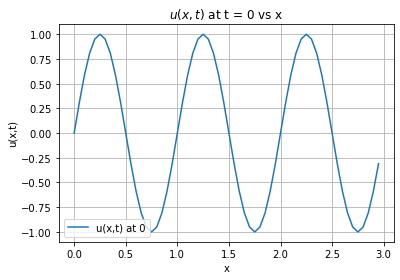

In [2]:
X = 3
T = 0
k = 0.5
q = 2

#x = np.linspace(0, X, Nx+1) # mesh points in space
delta_x = 0.05
#x = np.arange(0,X+0.01,delta_x)
x0 = np.arange(0,X,delta_x)
#t = np.linspace(0, T, Nt+1)    # time discretization
delta_t = 0.005
#t = np.arange(0,T+0.001,delta_t)
t = np.arange(0,T,delta_t)

D = a(k)*(delta_t/delta_x)

#print(len(x),len(t))
    
#u   = np.zeros(len(x)+1)           # approximation u at current time
u0   = np.zeros(len(x0))
#print(u.shape)
#u_n = np.zeros(len(x)+1)           # approximation u at previous time
    
# Set initial condition u(x,0) = I(x)
L = 1
for idx, space in enumerate(x0):
    #u_n[idx] = np.sin(2* np.pi * space/L)
    u0[idx] = np.sin(2* np.pi * space/L)
#print(u)        

#for time in range(1,len(t)):
# Compute u at inner mesh points
#    for idx in range(1,len(x)):
        #u[idx] = (1 - Lambda(k,delta_t, delta_x))*u_n[idx] + Lambda(k,delta_t, delta_x)*u_n[idx-1] + delta_t*g(q,x[idx])
#        u[time,idx] = (1 - Lambda(k,delta_t, delta_x))*u[time,idx]+Lambda(k,delta_t, delta_x)*u[time,idx-1]+delta_t*g(q,x[idx])
        
    
    # Insert boundary conditions
    #u[0] = 0;  
    #u[Nx] = f(t[n])
        
    # Update u_n before next step    
    #u_n[:]= u 
    #u = np.zeros(len(x)+1)

#print(u.shape)
#print(u)
        
plt.plot(x0, u0, label = f"u(x,t) at {T}")
plt.title(f"$u(x,t)$ at t = {T} vs x")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def Advection_Equation(X, T, k, q, L, dx, dt):
    
    delta_x = dx
    x = np.arange(0,X,delta_x)
    
    delta_t = dt
    t = np.arange(0,T,delta_t)
    
    D = a(k)*(delta_t/delta_x)
    
    u   = np.zeros((len(t),len(x)))
    
    for idx in range(len(x)):
        u[0,idx] = np.sin(2* np.pi * x[idx]/L)

    for time in range(1,len(t)):
        # Compute u at inner mesh points
        for idx in range(1,len(x)):
            u[time,idx] = u[time-1,idx]+D*(-u[time-1,idx] + u[time-1,idx-1])+delta_t*g(q,x[idx])
        
    plt.plot(x, u[-1], label = f"u(x,t) at {T}")
    plt.title(f"$u(x,t)$ at t = {T} vs x")
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return u[-1], x

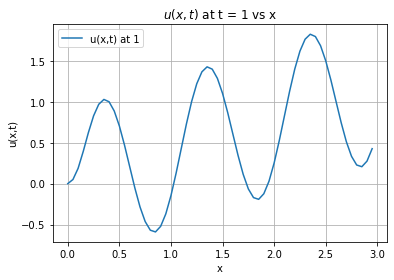

In [4]:
X = 3
T = 1
k = 0.5
q = 2
L = 1
dx = 0.05
dt = 0.005
u1, x1 = Advection_Equation(X, T, k, q, L, dx, dt)

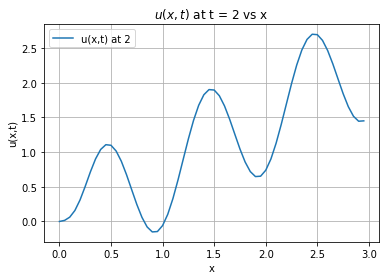

In [5]:
X = 3
T = 2
k = 0.5
q = 2
L = 1
dx = 0.05
dt = 0.005
u2, x2 = Advection_Equation(X, T, k, q, L, dx, dt)

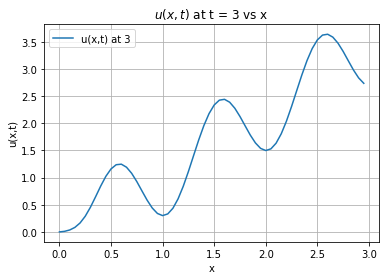

In [6]:
X = 3
T = 3
k = 0.5
q = 2
L = 1
dx = 0.05
dt = 0.005
u3, x3 = Advection_Equation(X, T, k, q, L, dx, dt)

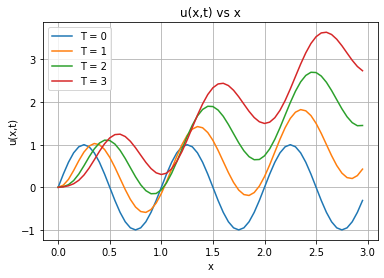

In [7]:
plt.plot(x0, u0, label = "T = 0")
plt.plot(x1, u1, label = "T = 1")
plt.plot(x2, u2, label = "T = 2")
plt.plot(x3, u3, label = "T = 3")
plt.title(f"u(x,t) vs x")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.show()

___

$\pagebreak$

# Problem 2

In [8]:
import matplotlib.pyplot as plt 
import numpy as np

def g(x):
    return 0

def f(x,L,m):
    if 0 <= x <= L/2:
        return (2*m*x)/L
    elif L/2 <= x <= L:
        return (2*m*(L-x))/L

def solve_wave_equation(L,Nx,T,Nt,c,m):
    x = np.linspace(0, L, Nx+1)    # mesh points in space
    dx = x[1] - x[0]
    t = np.linspace(0, T, Nt+1)    # time discretization
    dt = t[1] - t[0]
    D = (c*dt/dx)**2
    u   = np.zeros(Nx+1)            # approximation u at current time (n)
    u_n1 = np.zeros(Nx+1)           # approximation u at previous time (n-1)
    u_n2 = np.zeros(Nx+1)           # approximation u at previous time (n-2)

    #Insert boundary conditions
    u[0] = 0;  u[Nx] = 0
    u_n1[0] = 0;  u_n1[Nx] = 0
    u_n2[0] = 0;  u_n2[Nx] = 0
    
    # Set initial condition u(x,0) = f(x) 
    for i in range(1, Nx):
        u_n1[i] = f(x[i], L, m)  # Eq (2)

#############################################################################
    # Set initial condition du/dt|x=0 = g(x)     
    
    for i in range(1, Nx):    
        u[i]= (D*u_n1[i-1] + 2*(1-D)*u_n1[i] + D * u_n1[i+1])/2 + dt*g(x[i]) #Eq (5)

    for i in range(1, Nx):
        u_n2[i]= u_n1[i]
        u_n1[i]= u[i] 

#############################################################################
    for n in range(2, Nt):
        time = t[n]
    
        # Compute u at inner mesh points
        for i in range(1, Nx):
            u[i] = D*u_n1[i-1] + 2*(1-D)*u_n1[i] + D * u_n1[i+1] - u_n2[i] # Eq (1)
            
        for i in range(1, Nx):
            u_n2[i]= u_n1[i]
            u_n1[i]= u[i]

    plt.plot(x, u, 'r',marker='o', label = f"u(x,t) at time  = {T}")
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    #plt.xlim(-0.1, 1.1)
    #plt.ylim(-1.1, 1.1)
    plt.show()
    
    return u, x

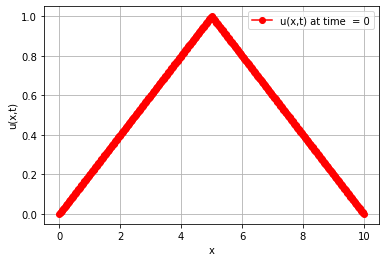

In [9]:
L=10
Nx=500
T=0
Nt=500
c=1
m=1
u1, x1 = solve_wave_equation(L,Nx,T,Nt,c,m)

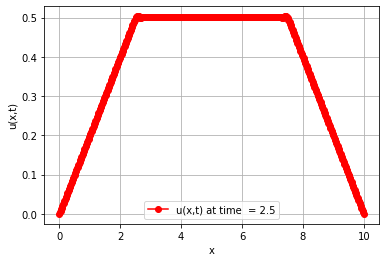

In [10]:
L=10
Nx=500
T=2.5
Nt=500
c=1
m=1
u2, x2 = solve_wave_equation(L,Nx,T,Nt,c,m)

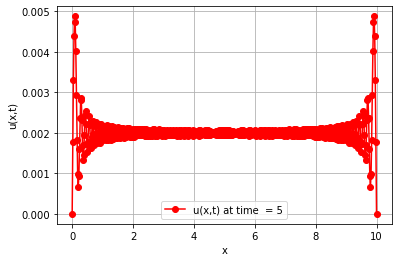

In [11]:
L=10
Nx=500
T=5
Nt=500
c=1
m=1
u3, x3 = solve_wave_equation(L,Nx,T,Nt,c,m)

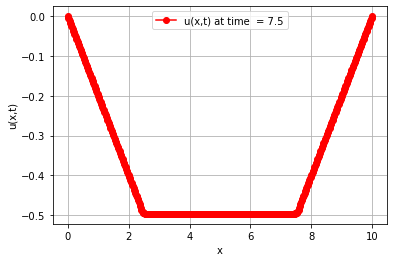

In [12]:
L=10
Nx=500
T=7.5
Nt=500
c=1
m=1
u4, x4 = solve_wave_equation(L,Nx,T,Nt,c,m)

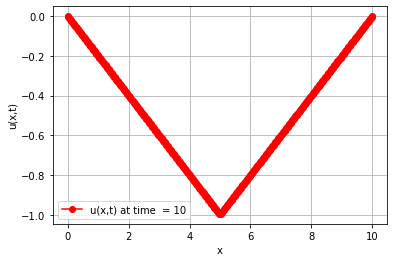

In [13]:
L=10
Nx=500
T=10
Nt=500
c=1
m=1
u5, x5 = solve_wave_equation(L,Nx,T,Nt,c,m)

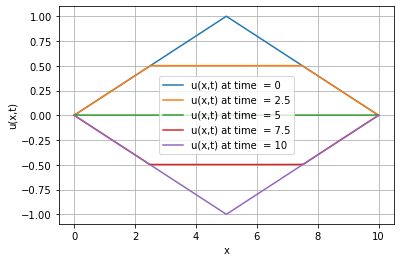

In [14]:
plt.plot(x1, u1, label = "u(x,t) at time  = 0")
plt.plot(x2, u2, label = "u(x,t) at time  = 2.5")
plt.plot(x3, u3, label = "u(x,t) at time  = 5")
plt.plot(x4, u4, label = "u(x,t) at time  = 7.5")
plt.plot(x5, u5, label = "u(x,t) at time  = 10")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
#plt.xlim(-0.1, 1.1)
#plt.ylim(-1.1, 1.1)
plt.show()

---
$\pagebreak$

# Problem 3

## (a)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a   =  0.0; # Location of boundary 'a' for 'x'
b   =  2.0; # Location of boundary 'b' for 'x'

c   =  0.0; # Location of boundary 'c' for 'y'
d   =  1; # Location of boundary 'd' for 'y'

dx = 0.05
Nx = len(np.arange(a,b,dx)) #N
dy = 0.05
Ny = len(np.arange(c,d,dy)) #M
print(Nx, Ny)

40 20


In [16]:
h = (b-a)/Nx
h

0.05

In [17]:
# D Matrix
D = np.zeros((Nx-1,Nx-1))
# D.shape
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        try:
            if i == j:
                D[i,j] = 4
                D[i, j+1] = -1
                D[i+1,j] = -1
        except:
            continue
print(D)

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]


In [18]:
# I matrix
I = np.eye(Nx-1)
# print(I)

In [19]:
print(D.shape,I.shape)

(39, 39) (39, 39)


In [20]:
# A matrix
m = n = (Nx-1)*(Ny)
rows = columns = m*n
A = np.zeros((m,n))
A.shape

(780, 780)

In [21]:
row_idx = np.arange(0,m+1,D.shape[0])
col_idx = np.arange(0,n+1,D.shape[1])
# print(row_idx,col_idx)
for idx, row_col in enumerate(zip(row_idx,col_idx)):
#     print (idx,row_col)
    try:
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx]:col_idx[idx+1]] = D
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx+1]:col_idx[idx+2]] = -I
        A[row_idx[idx+1]:row_idx[idx+2],col_idx[idx]:col_idx[idx+1]] = -I
    except:
        continue
A[row_idx[0]:row_idx[1],col_idx[1]:col_idx[2]] = -2*I
print(A)
# A[0,:]

[[ 4. -1.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]


In [22]:
B = np.zeros((A.shape[0],1))
B.shape
# B

(780, 1)

In [23]:
x = np.linspace(a,b,Nx+1) # Defining locations 'x'
y = np.linspace(c,d,Ny+1) # Defining locations 'x'
# print(x,y)

In [24]:
def f(x,y):
#     return -(2+((np.pi)**2)*x*(1-x))*np.cos((np.pi)*y)
    return 0

def alpha(x):
    return 0

def g(x,y):
#     return 0
    if x==0:
#         return 0
        return 50
    if x ==2:
#         return 0
        return 80
    if y==1:
#         return 0
        return 120
    else:
        return 0

# f(x[1],y[0])
# g(x[0],y[3])

In [25]:
b_idx =0
for y_idx in range(0,Ny):
    for x_idx in range(1,Nx):
        if y_idx-1 < 0:
            B[b_idx] = (-h**2)*f(x[x_idx],y[y_idx])+g(x[x_idx-1],y[y_idx])+2*h*alpha(x[x_idx])+g(x[x_idx+1],y[y_idx])+g(x[x_idx],y[y_idx+1])+g(x[x_idx],y[0])
        else:
            B[b_idx] = (-h**2)*f(x[x_idx],y[y_idx])+g(x[x_idx-1],y[y_idx])+2*h*alpha(x[x_idx])+g(x[x_idx+1],y[y_idx])+g(x[x_idx],y[y_idx+1])+g(x[x_idx],y[y_idx-1])
#         print(b_idx,x_idx,y_idx)
        b_idx = b_idx+1
# print(B)        

In [26]:
T =np.matmul(np.linalg.inv(A),B)
# T
T.shape

(780, 1)

In [27]:
T1  = np.reshape(T,(Ny,Nx-1))
# T1
T1.shape

(20, 39)

In [28]:
# Add boundary conditions
# Top B.C.
# top_bc = np.ones(Nx-1)*0
top_bc = np.ones(Nx-1)*120
# left_bc = (np.ones(Nx-1)*0)[...,None]
left_bc = (np.ones(Ny+1)*50)[...,None]
# print(left_bc)
# right_bc = (np.ones(Nx-1)*0)[...,None]
right_bc = (np.ones(Ny+1)*80)[...,None]
# top_bc
T1=np.vstack([T1, top_bc])
T1 = np.concatenate((T1, right_bc), 1)
T1 = np.concatenate((left_bc, T1), 1)
# T1
T1.shape

(21, 41)

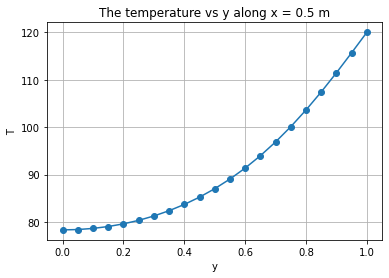

In [29]:
T_y = T1[:,10]
plt.plot(y,T_y,'o-')
plt.title('The temperature vs y along x = 0.5 m')
plt.xlabel('y')
plt.ylabel('T')
plt.grid()
plt.show()

---
$\pagebreak$

## (b)

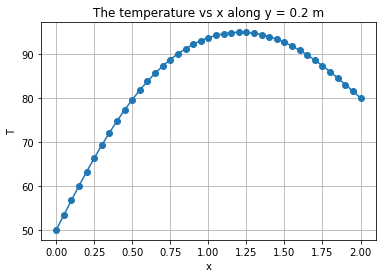

In [30]:
T_x = T1[4,:]
# T_x
plt.plot(x,T_x,'o-')
plt.title('The temperature vs x along y = 0.2 m')
plt.xlabel('x')
plt.ylabel('T')
plt.grid()
plt.show()

---
$\pagebreak$

## (c)

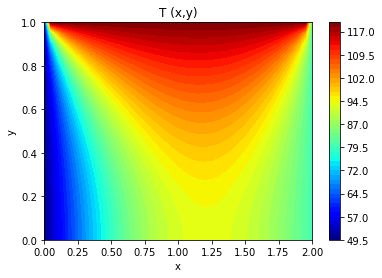

In [31]:
feature_x = np.linspace(a,b,Nx+1) 
feature_y = np.linspace(c,d,Ny+1)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
# fig, ax = plt.subplots(1, 1)
  
Z = T1

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm
  
# plots filled contour plot
plt.contourf(X, Y, Z, colorinterpolation, cmap=colourMap)
  
plt.title('T (x,y)')
plt.xlabel('x')
plt.ylabel('y')

plt.colorbar()

plt.show()

---
$\pagebreak$

## Problem 4

## (a)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

a   =  1.0; # Location of boundary 'a' for 'x'
b   =  2.0; # Location of boundary 'b' for 'x'

c   =  0.0; # Location of boundary 'c' for 'y'
d   =  1; # Location of boundary 'd' for 'y'

dx = 0.05
Nx = len(np.arange(a,b,dx)) #N
# Nx = 4 #N
dy = 0.05
Ny = len(np.arange(c,d,dy)) #M
# Ny = 3 #M
print(Nx, Ny)

20 20


In [33]:
h = (b-a)/Nx
h

0.05

In [34]:
# D Matrix
D = np.zeros((Nx-1,Nx-1))
# D.shape
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        try:
            if i == j:
                D[i,j] = 4
                D[i, j+1] = -1
                D[i+1,j] = -1
#             if i==0 and j==1:
#                 D[i,j+1] = -2
        except:
            continue
D[0][1] = -2
# print(D)

In [35]:
# I matrix
I = np.eye(Nx-1)
# print(I)

In [36]:
print(D.shape,I.shape)

(19, 19) (19, 19)


In [37]:
# A matrix
m = n = (Nx-1)*(Ny)
rows = columns = m*n
A = np.zeros((m,n))
A.shape

(380, 380)

In [38]:
row_idx = np.arange(0,m+1,D.shape[0])
col_idx = np.arange(0,n+1,D.shape[1])
# print(row_idx,col_idx)
for idx, row_col in enumerate(zip(row_idx,col_idx)):
#     print (idx,row_col)
    try:
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx]:col_idx[idx+1]] = D
        A[row_idx[idx]:row_idx[idx+1],col_idx[idx+1]:col_idx[idx+2]] = -I
        A[row_idx[idx+1]:row_idx[idx+2],col_idx[idx]:col_idx[idx+1]] = -I
    except:
        continue
A[row_idx[0]:row_idx[1],col_idx[1]:col_idx[2]] = -2*I
print(A)
# A[0,:]

[[ 4. -2.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [ 0. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1.  0.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ...  0. -1.  4.]]


In [39]:
B = np.zeros((A.shape[0],1))
B.shape
# B

(380, 1)

In [40]:
x = np.linspace(a,b,Nx) # Defining locations 'x'
y = np.linspace(c,d,Ny+1) # Defining locations 'x'
# print(x,y)

In [41]:
def f(x,y):
    return x+y

def alpha(x,y):
    return 0

def beta(x,y):
    if x == 1:
        return 2/(y**2+1)
    else:
        return 0
    
def g(x,y):
    if y==1:
        return np.log(x+4)
    if x == 2:
        return np.log(y**2+1)
    else:
        return 0

# f(x[1],y[0])
# g(x[0],y[3])

In [42]:
b_idx =0
for y_idx in range(0,Ny):
    for x_idx in range(0,Nx-1):
#         print(b_idx,x_idx,y_idx)
        B[b_idx] = (-h**2)*f(x[x_idx],y[y_idx])+2*h*alpha(x[x_idx],y[y_idx])+2*h*beta(x[x_idx],y[y_idx])+g(x[x_idx+1],y[y_idx])+g(x[x_idx],y[y_idx+1])
#         print(B[b_idx])
        b_idx = b_idx+1
# print(B)        

In [43]:
T =np.matmul(np.linalg.inv(A),B)
# T

In [44]:
T1  = np.reshape(T,(Ny,Nx-1))
# T1

In [45]:
top_bc = []
for X in x:
    ans = np.log(X+4)
    top_bc.append(ans)
# print(top_bc)
top_right_corner = top_bc[-1]
# top_right_corner
top_bc.pop()
top_bc = np.array(top_bc)
# top_bc
right_bc = []
for Y in y:
#     print(Y)
    ans = np.log(Y**2+1)
    right_bc.append(ans)
# print(right_bc)
corner_ans =top_right_corner+right_bc[-1]
# corner_ans
right_bc.pop()
# right_bc
right_bc.append(corner_ans)
right_bc
right_bc = np.array(right_bc)[...,None]

In [46]:
# Add boundary conditions
T1=np.vstack([T1, top_bc])
T1 = np.concatenate((T1, right_bc), 1)
# T1

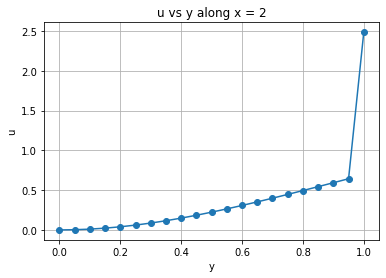

In [47]:
T_y = T1[:,-1]
plt.plot(y,T_y,'o-')
plt.title('u vs y along x = 2')
plt.xlabel('y')
plt.ylabel('u')
plt.grid()
plt.show()

---
$\pagebreak$

## (b)

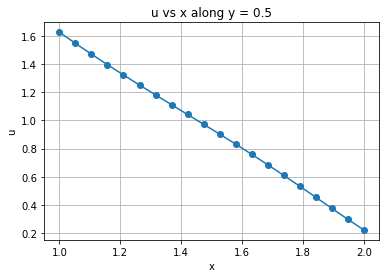

In [48]:
T_x = T1[10,:]
# T_x
plt.plot(x,T_x,'o-')
plt.title('u vs x along y = 0.5')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()

---
$\pagebreak$

## (c)

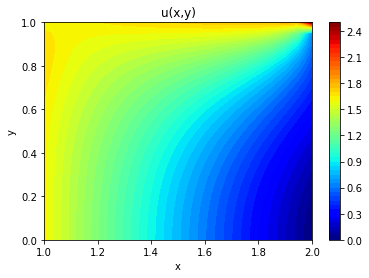

In [49]:
feature_x = np.linspace(a,b,Nx) 
feature_y = np.linspace(c,d,Ny+1)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)
  
# fig, ax = plt.subplots(1, 1)
  
Z = T1

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm
  
# plots filled contour plot
plt.contourf(X, Y, Z, colorinterpolation, cmap=colourMap)
  
plt.title('u(x,y)')
plt.xlabel('x')
plt.ylabel('y')

plt.colorbar()

plt.show()